In [1]:
%load_ext autoreload
%autoreload 2

In [78]:
import numpy as np
np.random.seed(1)

classes = 10
group_size = 100
x = []
y = []
for c in range(classes):
    g = np.random.normal(loc=np.random.uniform(-20, 20, 2), scale=np.random.uniform(1, 5, 2), size=(group_size, 2))
    x.append(g)
    y.append(np.ones(group_size) * c)
    
x = np.concatenate(x)
y = np.concatenate(y).astype(int)

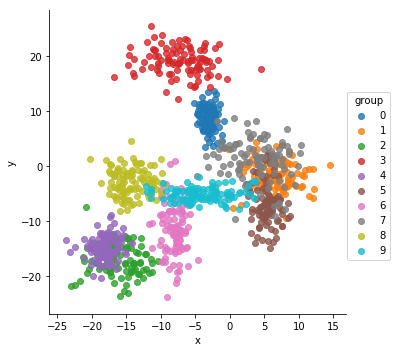

In [79]:
%matplotlib inline
import seaborn as sns

df = pd.DataFrame(dict(x=x[:, 0], y=x[:, 1], group=y))

sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='group')

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [82]:
from lib.model import Model
from sklearn.metrics import accuracy_score

options = dict(
    standardize = True,
    l2_lambda = 1,
    multiclass = 'ovo',
    objective = 'huber_hinge',
    kernel = dict(
        fn = 'rbf',
        gamma = 10,
        degree = 2
    )
)

model = Model(options)
model.fit(x_train, y_train, x_test, y_test)
yhat = model.predict(x_test)

yhat, accuracy_score(yhat, y_test)

100%|██████████| 45/45 [00:00<00:00, 77.89it/s]


(array([9, 8, 2, 1, 6, 9, 0, 2, 3, 7, 4, 5, 1, 2, 1, 0, 9, 1, 0, 0, 0, 4,
        3, 3, 8, 7, 0, 1, 1, 0, 8, 1, 6, 7, 4, 7, 8, 3, 9, 4, 2, 9, 6, 6,
        2, 1, 8, 1, 3, 5, 3, 4, 4, 4, 8, 5, 2, 2, 9, 3, 1, 6, 1, 2, 4, 7,
        2, 1, 2, 5, 7, 2, 1, 4, 9, 4, 3, 7, 6, 6, 2, 4, 3, 9, 9, 6, 2, 5,
        4, 8, 4, 2, 9, 2, 6, 4, 5, 1, 3, 6, 7, 8, 0, 9, 3, 6, 9, 1, 9, 2,
        0, 5, 4, 5, 4, 3, 5, 3, 4, 5, 5, 9, 1, 9, 0, 8, 3, 2, 9, 6, 4, 9,
        5, 1, 7, 6, 3, 0, 7, 8, 7, 9, 1, 4, 4, 4, 3, 3, 0, 0, 2, 0, 4, 7,
        9, 9, 4, 3, 8, 4, 5, 9, 6, 8, 9, 3, 3, 9, 3, 4, 9, 7, 1, 9, 4, 7,
        2, 6, 8, 1, 7, 9, 4, 3, 9, 9, 7, 4, 7, 4, 9, 8, 4, 0, 1, 6, 7, 2,
        6, 1, 9, 5, 3, 9, 8, 9, 8, 1, 5, 9, 1, 6, 0, 8, 8, 9, 1, 1, 0, 5,
        8, 5, 9, 2, 4, 2, 6, 5, 0, 2, 5, 3, 6, 7, 0, 0, 6, 1, 1, 1, 5, 4,
        2, 3, 9, 4, 3, 0, 4, 9]), 0.848)

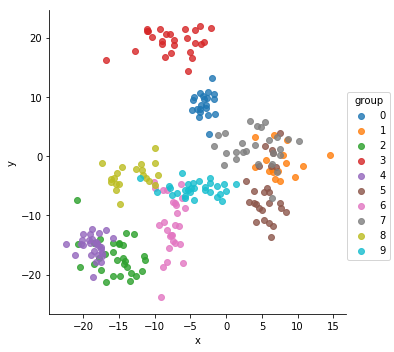

In [84]:
df = pd.DataFrame(dict(x=x_test[:, 0], y=x_test[:, 1], group=y_test))

sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='group')

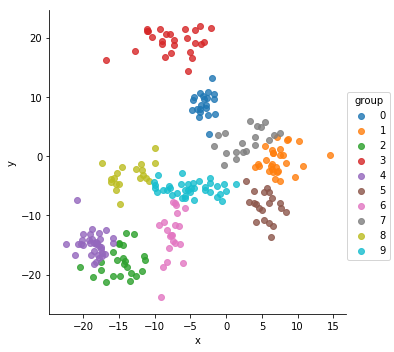

In [85]:
df = pd.DataFrame(dict(x=x_test[:, 0], y=x_test[:, 1], group=yhat))

sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='group')

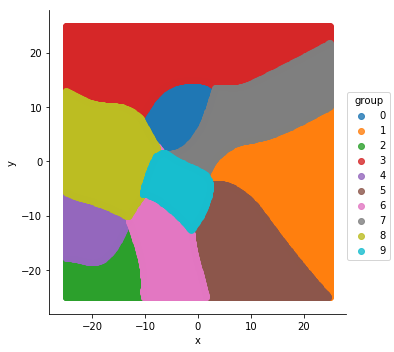

In [92]:
import itertools
span = list(range(-250, 250))
surface_x = np.array(list(itertools.product(span, span)))/10
yhat_s = model.predict(surface_x)
df = pd.DataFrame(dict(x=surface_x[:, 0], y=surface_x[:, 1], group=yhat_s))

sns.lmplot('x', 'y', data=df, fit_reg=False, hue='group')